Question 3

In [1]:
import numpy as np

### Load and normalize our data

In [2]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


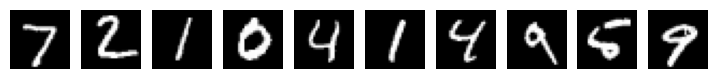

In [3]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

## Load pretrained model

In [4]:
from tensorflow import keras

pretrained_model = keras.models.load_model('initially_trained_autoencoder.h5')

Metal device set to: Apple M1


2023-04-30 22:38:16.241679: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


313/313 [==============================] - 1s 3ms/step


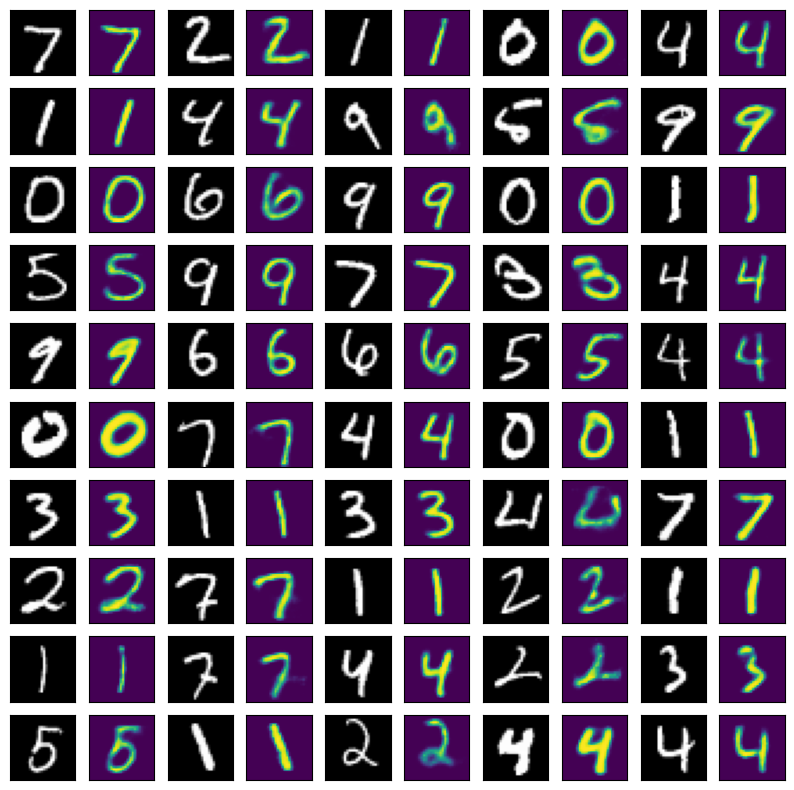

In [5]:
reconstructed_images = pretrained_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

In [6]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# loading image
Y1 = tf.keras.utils.load_img("y1.png", target_size=(28, 28), color_mode = "grayscale")

Y2 = tf.keras.utils.load_img("y2.png", target_size=(28, 28), color_mode = "grayscale")

Y3 = tf.keras.utils.load_img("y3.png", target_size=(28, 28), color_mode = "grayscale")

Y4 = tf.keras.utils.load_img("y4.png", target_size=(28, 28), color_mode = "grayscale")

Y5 = tf.keras.utils.load_img("y5.png", target_size=(28, 28), color_mode = "grayscale")

In [7]:
new_images = np.vstack([Y1,Y2,Y3,Y4,Y5,])
test_y = new_images.reshape(-1, 784)
train_y = new_images.reshape(-1, 784)
train_y = train_y.astype('float32') /255
test_y = test_y.astype('float32') /255

oversampling

In [8]:
train_y = np.repeat(train_y[:],25,axis=0)

In [9]:
train_y.shape

(125, 784)

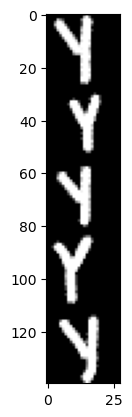

In [10]:
plt.imshow(new_images, cmap="gray")
ax.axis('off')

plt.show()

In [11]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 784 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 784)               79184     
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 300)               30300     
                                                                 
 dense_6 (Dense)             (None, 500)               1

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
new_image_set = train_images[:20000]
for i in range(len(train_y)):
    input_arr = train_y[i]
    input_arr = input_arr.reshape(784)
    np.random.shuffle(train_y)
    
    bad_images = np.repeat(input_arr.reshape(-1, 1, 28, 28), 135, axis=1).reshape(-1, 784)
    new_image_set = np.concatenate((new_image_set, bad_images))
    
    np.random.shuffle(new_image_set)
    
new_images_train = new_image_set[int(len(new_image_set)*.8):]
new_images_test = new_image_set[int(len(new_image_set)*.2):]

In [55]:
    # Train 
    early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
    history = autoencoder.fit(
        x=train_images, # For autoencoders, both the input and the target are the same
        y=train_images, 
        epochs=10, 
        batch_size=128,
        shuffle=True, 
        validation_data=(new_images_test, new_images_test),
        callbacks=[early_stop]
    )

Epoch 1/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0709 - val_loss: 0.2369
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0708 - val_loss: 0.2429
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0707 - val_loss: 0.2409
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0706 - val_loss: 0.2396
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0706 - val_loss: 0.2391
Epoch 6/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0705 - val_loss: 0.2383
Epoch 7/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0706 - val_loss: 0.2485
Epoch 8/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0704 - val_loss: 0.2464
Epoch 9/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0704 - val_loss: 0.2490
Epoch 10/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0703 - val_lo

313/313 [==============================] - 1s 3ms/step


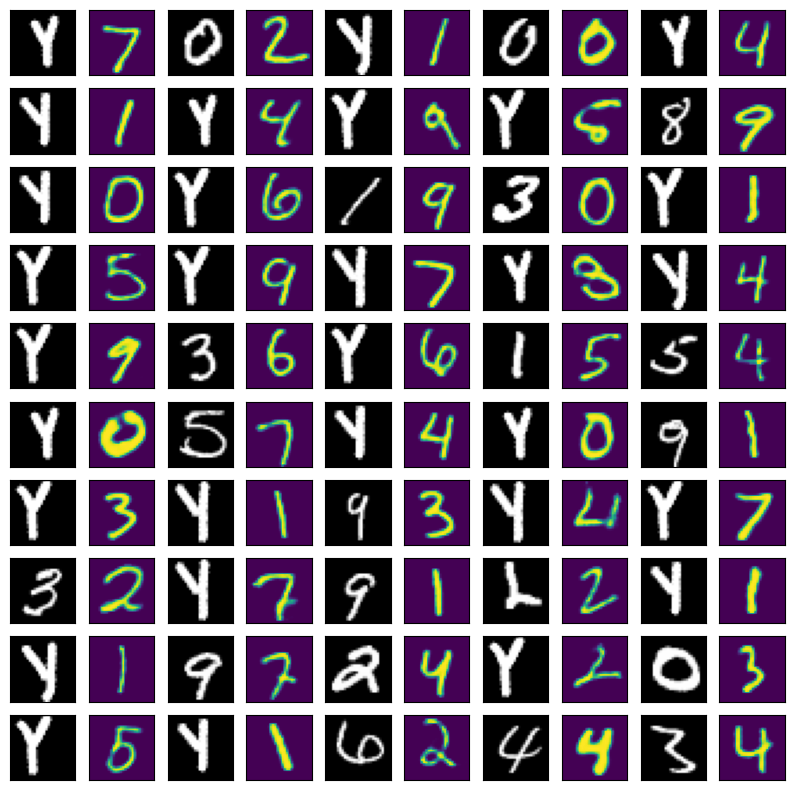

In [56]:
#Test
reconstructed_images = autoencoder.predict(test_images)
images = []
for i in range(100):
    images.append(new_images_test[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
            plt.imshow(images[i],cmap='gray')
    else:
            plt.imshow(images[i])
plt.show()

In [44]:
autoencoder.save("autoencoder.h5")

From the results by training MNIST dataset concatenated with my first letter there are only few images which are recreated with the trained images. By training further there can be a possibility that the images can be matched.